Filter CSV for instances where cyano is detected

In [1]:
import rasterio
from rasterio.windows import Window
from pyproj import Transformer
import numpy as np
import os
from os import listdir
from os.path import isfile, join
np.random.seed(42)
import pandas as pd
import copy
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter

import math
import pyproj
import pickle as pkl
import geojson
import cv2
from PIL import Image, ImageEnhance
import cv2
os.getcwd()

/Users/sarah/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


'/Users/sarah/Satellite_Image_Processing/Bloom_Image_Processing'

given csv with most up to date validated sample blooms `CEEG_v2`, we need to extract the dates from the csv, into a list of some sort, and then iterate through all of our planet directories, and pull the images that match. This will exapnd our ground truth dataset since instead of haiving one low-resolution GT label, we will have 6 high resolution images hopefully of blooms. There is possibility that the dates wont overlap and we will lose a day of imagery, but this shouldn't be too much of a discrepancy.  

In [2]:
df = pd.read_excel('CEEG_v2.xlsx')

df = df[df['AlgalGroup']=='Cyanobacteria']
df.reset_index(drop=True, inplace=True)


In [10]:
newdf = df.loc[df['Waterbody'] == 'Chowan River']

In [12]:
print(len(newdf))
len(df.loc[df['AlgalGroup'] == 'Cyanobacteria'])

570


574

In [11]:
newdf.head()

Waterbody                       StationDesc    Storet DateCollected  \
0  Chowan River    Chowan Riv at CM 7 at Colerain  D8950000    2016-01-26   
1  Chowan River  Chowan Riv at US 17 at Edenhouse  D9490000    2016-06-27   
2  Chowan River  Chowan River nr Indian Crk Mouth       NaN    2016-07-20   
3  Chowan River  Chowan River nr Indian Crk Mouth       NaN    2016-07-20   
4  Chowan River  Chowan River nr Indian Crk Mouth       NaN    2016-07-20   

   County      Smplid     AlgalGroup          Genus      Species  \
0  Chowan  11305-2016  Cyanobacteria  Pseudanabaena         spp.   
1  Bertie  11513-2016  Cyanobacteria  Aphanizomenon         spp.   
2  CHOWAN  11526-2016  Cyanobacteria       Anabaena  planctonica   
3  CHOWAN  11526-2016  Cyanobacteria    Chroococcus         spp.   
4  CHOWAN  11526-2016  Cyanobacteria  Pseudanabaena         spp.   

   Cell Density  Unit Density  Biovolume       Lat      Long  
0         871.0          73.0        9.0  36.20983 -76.72677  
1         145.0          36.0        2.0  36.04760 -76.69611  
2        7842.0        1961.0      784.0  36.23500 -76.67000  
3        4066.0         399.0        2.0  36.23500 -76.67000  
4         436.0          36.0        4.0  36.23500 -76.67000

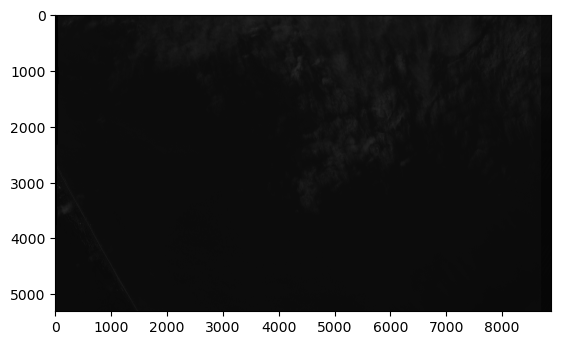

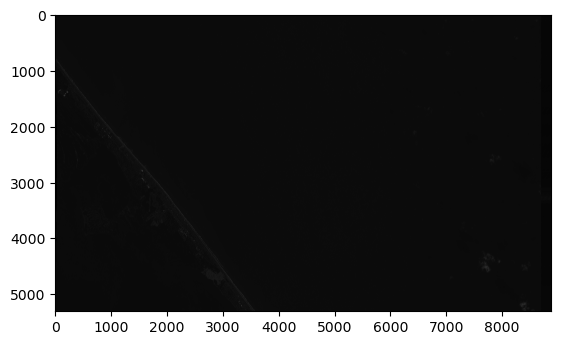

KeyboardInterrupt: 

In [10]:
directory = '../abemarle_4b'
lat, lon = 35.8212205, -76.290862
for file in sorted(listdir(directory)):
    if file.endswith('.tif'):
        working_path = os.path.join(directory, file)
        img = cv2.imread(working_path)
        rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#         print(img.shape)
        plt.imshow(rgb_image)
        plt.show()
#         with rasterio.open(working_path) as rds:
#             print(rds.crs)
#             transformer = Transformer.from_crs("EPSG:4326", rds.crs, always_xy=True)
#             xx, yy = transformer.transform(lon, lat)
#             row, col = rds.index(xx, yy)
            
#             data = rds.read()
#             data = np.moveaxis(data, 0, 2)   
#             img_arr = np.array(data)
#             print(img_arr.shape)
#             plt.imshow(data[:,:,:3])
#             plt.axis('off')
#             plt.show()
                

sentinel-3.2023002.0102.1537C.b.L3.NC3.v951T202211_1_3.CIcyano.albemarle.tif


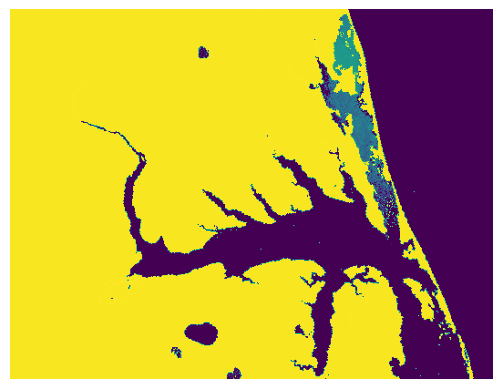

(406, 530, 1)
sentinel-3.2023002.0102.1537C.b.L3.NC3.v951T202211_1_3.truecolor.albemarle.tif


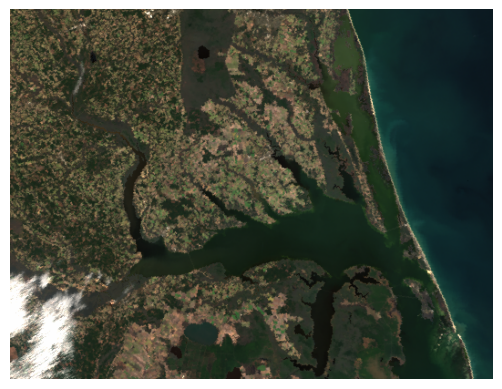

(406, 530, 3)


In [11]:
#image shape 673x530
from matplotlib import cm
directory = 'all_data/albemarle_2023_archive'
lat, lon = 35.8212205, -76.290862

y = 145
x = 0
pixel_counts = Counter()

for file in sorted(os.listdir(directory))[3:5]:
    if file.endswith('.tif'): # and file.split('.')[-3] == 'CIcyano':
        print(file)
        working_path = os.path.join(directory, file)
        with rasterio.open(working_path) as rds:
            transformer = Transformer.from_crs("EPSG:4326", rds.crs, always_xy=True)
            xx, yy = transformer.transform(lon, lat)
            row, col = rds.index(xx, yy)
            
            if row > y and col > x:
                try:
                    window = Window.from_slices(rows = (0, col+y), cols =(0,rds.width))
#                 try:
#                     window = Window.from_slices(rows=(0, row + y), cols=(0, rds.width))
                    data = rds.read(window=window)
                    data = np.moveaxis(data, 0, 2)   
                    img_arr = np.array(data)
                    plt.imshow(data)
                    plt.axis('off')
                    plt.show()
                    print(data.shape)
                except Exception as e:
                    print(e)
                    pass
            


In [15]:
# def image_cropping(main_directory, cropped_img_folder_name, lat, lon, y, save=False):
#     # Make directory for newly cropped images
#     PROJECT_ROOT_DIR = main_directory
#     PROJECT_SAVE_DIR = cropped_img_folder_name
    
#     if not os.path.isdir(os.path.join(PROJECT_ROOT_DIR, PROJECT_SAVE_DIR)):
#         print("Figure directory didn't exist, creating now.")
#         os.mkdir(os.path.join(PROJECT_ROOT_DIR, PROJECT_SAVE_DIR))
#     else:
#         print('Figure directory exists.') 
        
#     new_dir = os.path.join(PROJECT_ROOT_DIR, PROJECT_SAVE_DIR)

#     for fi in sorted(listdir(main_directory)):
#         if fi.endswith(".tif"):
#             working_path = os.path.join(main_directory, fi)
#             with rasterio.open(working_path) as rds:
#                 transformer = Transformer.from_crs("EPSG:4326", rds.crs, always_xy=True)
#                 xx, yy = transformer.transform(lon, lat)
#                 row, col = rds.index(xx, yy)
#                 if row > y:
#                     try:
#                         window = Window.from_slices(rows=(row - y, row + y), cols=(0, rds.width))
#                         data = rds.read(window=window)
                        
#                         data = np.moveaxis(data, 0, 2)    # Move axes of an array to new positions

#                         img_arr = np.array(data)
#                         black_space = np.mean(img_arr / 255)
#                         print(black_space)
#                         if black_space < 0.25 or black_space < 0.9:
#                             plt.imshow(data)
#                             plt.axis('off')
#                             plt.show()
#                             if save:
#                                 im = Image.fromarray(data)
#                                 im.save(os.path.join(main_directory, cropped_img_folder_name, fi))  
#                     except Exception as e:
#                         print(e)
#                         pass
#                 else:
#                     print('Invalid row length: ', row)
#                     pass

In [3]:
df = pd.read_csv('CEEG.csv')
df2 = pd.read_csv('CEEG_sites.csv')

In [4]:
df1s = set()
for x, y in zip(df['Lat'], df['Long']):
    df1s.add(tuple((x,y)))

In [5]:
df2s = set()
for a, b in zip(df2['Lat'], df2['Long']):
    df2s.add(tuple((a,b)))

In [6]:
newdf = pd.merge(df, df2[['Lat', 'Long', 'Site']], on=['Lat', 'Long'], how='left')

In [8]:
newdf.to_csv('sites_added.csv')

In [27]:

h=set()
for index, row in newdf.iterrows():
    h.add(row['Site'])
#     print(f"Latitude: {row['Lat']}, Longitude: {row['Long']}, Site: {row['Site']}")

In [31]:
df_ = newdf.dropna(subset=['Site'])

In [32]:
df_ = df_.reset_index(drop=True)

In [45]:
df_.to_csv('sitedata.csv')

In [36]:
i=0
for index, row in df_.iterrows():
    if row['AlgalGroup'] == 'Cyanobacteria':
        i += 1
        
print(i)

768


In [37]:
data = df_[df_['AlgalGroup']=='Cyanobacteria']

In [39]:
h=set()
for index, row in data.iterrows():
    h.add(row['Site'])

In [42]:
data = data.reset_index(drop=True)

In [43]:
data.to_csv('cyano_only.csv')

In [44]:
data

g                       StationDesc    Storet DateCollected  \
0    Chowan River    Chowan Riv at CM 7 at Colerain  D8950000       1/26/16   
1    Chowan River    Chowan Riv at CM 7 at Colerain  D8950000       1/26/16   
2    Chowan River  Chowan Riv at US 17 at Edenhouse  D9490000       6/27/16   
3    Chowan River  Chowan Riv at US 17 at Edenhouse  D9490000       6/27/16   
4    Chowan River  Chowan Riv at US 17 at Edenhouse  D9490000       6/27/16   
..            ...                               ...       ...           ...   
763  Chowan River      Chowan Riv at Edenton Bridge  D9490010       5/29/24   
764  Chowan River      Chowan Riv at Edenton Bridge  D9490010       5/29/24   
765  Chowan River      Chowan Riv at Edenton Bridge  D9490010       5/29/24   
766  Chowan River      Chowan Riv at Edenton Bridge  D9490010       5/29/24   
767  Chowan River      Chowan Riv at Edenton Bridge  D9490010        6/6/24   

     County      Smplid     AlgalGroup          Genus   Species  Cell Density  \
0    Chowan  11305-2016  Cyanobacteria  Pseudanabaena      spp.         871.0   
1    Chowan  11305-2016  Cyanobacteria  Pseudanabaena      spp.         871.0   
2    Bertie  11513-2016  Cyanobacteria  Aphanizomenon      spp.         145.0   
3    Bertie  11513-2016  Cyanobacteria  Aphanizomenon      spp.         145.0   
4    Bertie  11513-2016  Cyanobacteria  Aphanizomenon      spp.         145.0   
..      ...         ...            ...            ...       ...           ...   
763  CHOWAN  15496-2024  Cyanobacteria    Aphanothece  saxicola        2178.0   
764  CHOWAN  15496-2024  Cyanobacteria    Chroococcus      spp.         944.0   
765  CHOWAN  15496-2024  Cyanobacteria     Polycystis     firma        1452.0   
766  CHOWAN  15496-2024  Cyanobacteria  Pseudanabaena      spp.         290.0   
767  CHOWAN  15498-2024  Cyanobacteria    Chroococcus      spp.         508.0   

     Unit Density  Biovolume      Lat     Long Site  
0            73.0        9.0  36.2098 -76.7268  A08  
1            73.0        9.0  36.2098 -76.7268  A08  
2            36.0        2.0  36.0476 -76.6961  A15  
3            36.0        2.0  36.0476 -76.6961  A15  
4            36.0        2.0  36.0476 -76.6961  A15  
..            ...        ...      ...      ...  ...  
763          36.0        4.0  36.0536 -76.6841  A18  
764         145.0        0.0  36.0536 -76.6841  A18  
765          73.0        0.0  36.0536 -76.6841  A18  
766          36.0        3.0  36.0536 -76.6841  A18  
767          73.0        0.0  36.0536 -76.6841  A18  

[768 rows x 15 columns]